<a href="https://colab.research.google.com/github/AmineF0/AI-ML-DS-Ressources/blob/main/MNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy tensorflow matplotlib scikit-learn

generating classification data

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Generate Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Approach 1 : using a single NN

7/7 [==============================] - 0s 7ms/step
Accuracy: 0.93


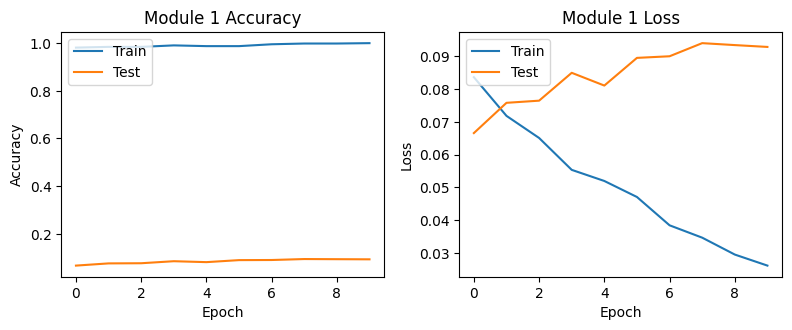

In [ ]:
# Step 3: Designing Modular Neural Networks
def create_module(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu')
    ])
    return model


# a single module representing the NN
module1 = create_module((20,))

# Step 4: Training the Modules
module1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
module1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluation
y_pred = np.argmax(module1.predict([X_test]), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Step 6: Plotting the Results
# Here you can add any specific plots you want, like loss curves or accuracy over epochs.
import matplotlib.pyplot as plt

# Modifying the training process to store history
history1 = module1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values for Module 1
plt.subplot(2, 3, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_loss'])
plt.title('Module 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values for Module 1
plt.subplot(2, 3, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Module 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Approach 2 : splitting to 2 modular NN

7/7 [==============================] - 0s 3ms/step
Accuracy: 0.925


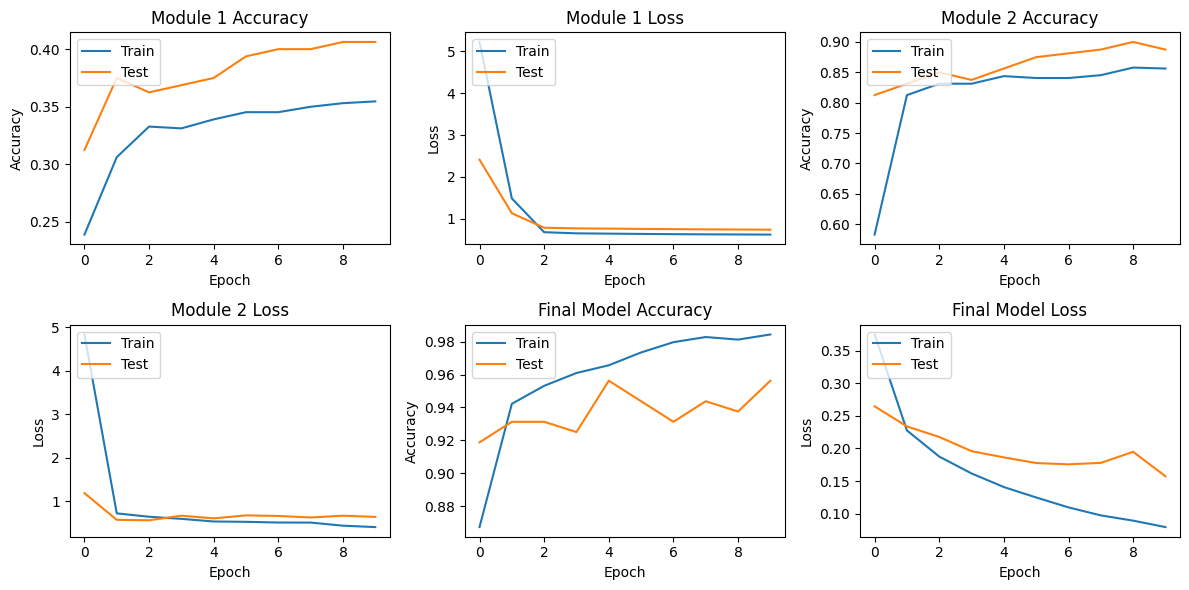

In [ ]:
# Split features for two modules
X_train_mod1 = X_train[:, :10]
X_train_mod2 = X_train[:, 10:]
X_test_mod1 = X_test[:, :10]
X_test_mod2 = X_test[:, 10:]

# Step 3: Designing Modular Neural Networks
def create_module(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu')
    ])
    return model

module1 = create_module((10,))
module2 = create_module((10,))

# Step 4: Training the Modules
module1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
module2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

module1.fit(X_train_mod1, y_train, epochs=10, batch_size=32, verbose=0)
module2.fit(X_train_mod2, y_train, epochs=10, batch_size=32, verbose=0)

# Step 5: Integration and Final Classification
combined_input = tf.keras.layers.concatenate([module1.output, module2.output])
final_output = tf.keras.layers.Dense(2, activation='softmax')(combined_input)
final_model = tf.keras.models.Model(inputs=[module1.input, module2.input], outputs=final_output)

final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
final_model.fit([X_train_mod1, X_train_mod2], y_train, epochs=10, batch_size=32, verbose=0)

# Evaluation
y_pred = np.argmax(final_model.predict([X_test_mod1, X_test_mod2]), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Step 6: Plotting the Results
# Here you can add any specific plots you want, like loss curves or accuracy over epochs.
import matplotlib.pyplot as plt

# Modifying the training process to store history
history1 = module1.fit(X_train_mod1, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
history2 = module2.fit(X_train_mod2, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
final_history = final_model.fit([X_train_mod1, X_train_mod2], y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values for Module 1
plt.subplot(2, 3, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Module 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values for Module 1
plt.subplot(2, 3, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Module 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation accuracy values for Module 2
plt.subplot(2, 3, 3)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Module 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values for Module 2
plt.subplot(2, 3, 4)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Module 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation accuracy values for Final Model
plt.subplot(2, 3, 5)
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Final Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values for Final Model
plt.subplot(2, 3, 6)
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Final Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Comparaison of N modules

1
63/63 [==============================] - 0s 2ms/step
2
63/63 [==============================] - 0s 2ms/step
3
63/63 [==============================] - 0s 4ms/step
4
63/63 [==============================] - 0s 3ms/step
5
63/63 [==============================] - 0s 2ms/step
6
63/63 [==============================] - 0s 3ms/step
7
63/63 [==============================] - 0s 2ms/step
8
63/63 [==============================] - 0s 2ms/step
9
63/63 [==============================] - 0s 3ms/step


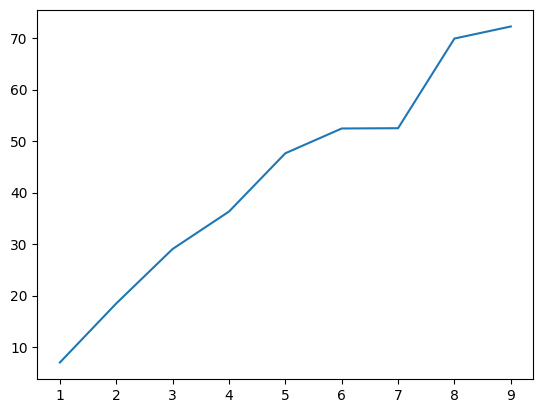

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math
import time

n_features = 100

# Step 2: Generate Synthetic Dataset
X, y = make_classification(n_samples=10000, n_features=n_features, n_informative=n_features-5, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# declaration of number of modules
modules_count = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Step 3: Designing Modular Neural Networks
def create_module(input_shape, module_count):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(min(math.ceil(64/module_count), input_shape), activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(min(math.ceil(32/module_count), input_shape), activation='relu'),
        tf.keras.layers.Dense(min(math.ceil(12/module_count), input_shape), activation='relu')
    ])
    return model

def train_module(module_count):
  start_time = time.time()

  # Split features to n modules
  X_train_mod = np.array_split(X_train, module_count, axis=1)
  X_test_mod = np.array_split(X_test, module_count, axis=1)

  modules = [
      create_module(i.shape[1], module_count) for i in X_train_mod
  ]

  # Step 4: Training the Modules
  for module in modules:
    module.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  for module , X_train_module in zip(modules, X_train_mod):
    module.fit(X_train_module, y_train, epochs=10, batch_size=32, verbose=0)

  # Step 5: Integration and Final Classification
  combined_input = tf.keras.layers.concatenate([module.output for module in modules])

  final_output = tf.keras.layers.Dense(len(modules), activation='softmax')(combined_input)
  if module_count != 1:
    final_model = tf.keras.models.Model(inputs=[module.input for module in modules], outputs=final_output)

    final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    final_model.fit(X_train_mod, y_train, epochs=10, batch_size=32, verbose=0)
  else:
    final_model = modules[0]

  end_time = time.time()
  # Evaluation
  y_pred = np.argmax(final_model.predict(X_test_mod), axis=1)
  accuracy = accuracy_score(y_test, y_pred)

  return accuracy, end_time - start_time

timeUsed = []
accuracy = []
for c in modules_count:
  print(c)
  acc, timeI = train_module(c)
  timeUsed.append(timeI)
  accuracy.append(acc)

plt.plot(modules_count, timeUsed)

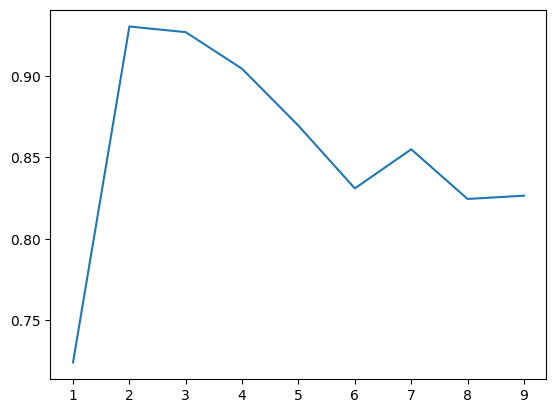

In [ ]:
plt.plot(modules_count, accuracy)